In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, ConfusionMatrixDisplay,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, StratifiedKFold

In [9]:
df = pd.read_csv("predict_students_dropout_and_academic_success.csv",delimiter=";")
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])
# rfc = RandomForestClassifier(n_estimators=5400)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[::-1],df["Target"],train_size=0.2,random_state=42)
# rfc.fit(X=x_train,y=y_train)


In [ ]:
max_iter=10000

In [ ]:
# Example model
model = LogisticRegression(max_iter=max_iter)

# Create the RFE selector, specifying the number of features you want to keep
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the selector to your training data
rfe.fit(x_train, y_train)

# Get the selected features (True for selected, False for dropped)
selected_mask = rfe.support_

# Print selected feature names
selected_features = x_train.columns[selected_mask]
print("Selected features:", selected_features)

c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features: Index(['Marital status', 'Daytime/evening attendance',
       'Educational special needs', 'Debtor', 'International'],
      dtype='object')


c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

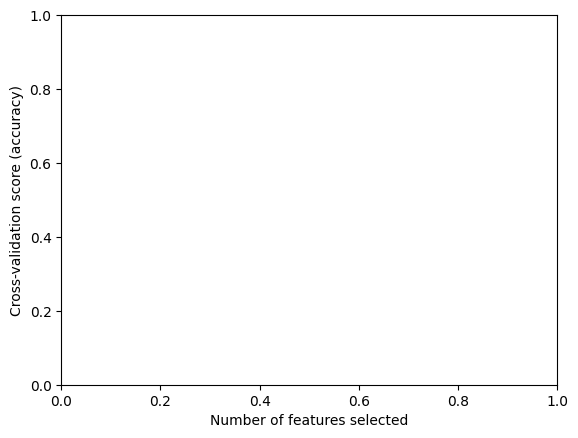

In [ ]:
# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(5)

# Apply RFECV
model = LogisticRegression(max_iter=max_iter)
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
rfecv.fit(x_train, y_train)

# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [12]:
# Use the selected features to train final model
X_test_selected = rfecv.transform(x_test)
X_train_selected = rfecv.transform(x_train)

# Retrain model on selected features
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# === Evaluation ===

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision per class
print("\nPrecision per class:")
precisions = precision_score(y_test, y_pred, average=None)
for idx, prec in enumerate(precisions):
    print(f"Class {idx}: {prec:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1150
           1     0.1667    0.0109    0.0205       642
           2     0.4931    0.9868    0.6576      1748

    accuracy                         0.4893      3540
   macro avg     0.2199    0.3326    0.2260      3540
weighted avg     0.2737    0.4893    0.3284      3540


Confusion Matrix:
[[   0   12 1138]
 [   0    7  635]
 [   0   23 1725]]

Precision per class:
Class 0: 0.0000
Class 1: 0.1667
Class 2: 0.4931


c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\w